# SIMULACIÓN | LABORATORIO 4 - PAUTA


## Generación de número pseudo-aleatorios

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from IPython.display import display
import ipywidgets as widgets
import random

### El módulo Random de python 


**Ejercicio 1:**
- Defina lo que es una semilla y para qué sirve
- use random.random() para generar números aleatorios. 
- use una semilla con random.seed(semilla), y vuelva a ejecutar random.random()
- ¿qué ocurre si vuelve a definir la misma semilla y ejecutar random.random()?



**Respuesta** 

Una semilla es el valor inicial con el cual comienza el algoritmo iterativo de generación de números aleatorios. Permite controlar que las secuencias generadas sean las mismas cada vez, si se usa la misma semilla, o diferentes, si se va cambiando su valor de un llamado a otro del generador de números aleatorios.
Como se ve en la ejecución mas abajo, al predefinir el valor de la semilla se repite la secuencia de valores pseudo-aleatorios definidos.


(array([11.,  9.,  6., 12.,  7., 12.,  6., 14.,  8., 15.]),
 array([0.01988392, 0.11783603, 0.21578814, 0.31374024, 0.41169235,
        0.50964446, 0.60759657, 0.70554867, 0.80350078, 0.90145289,
        0.999405  ]),
 <BarContainer object of 10 artists>)

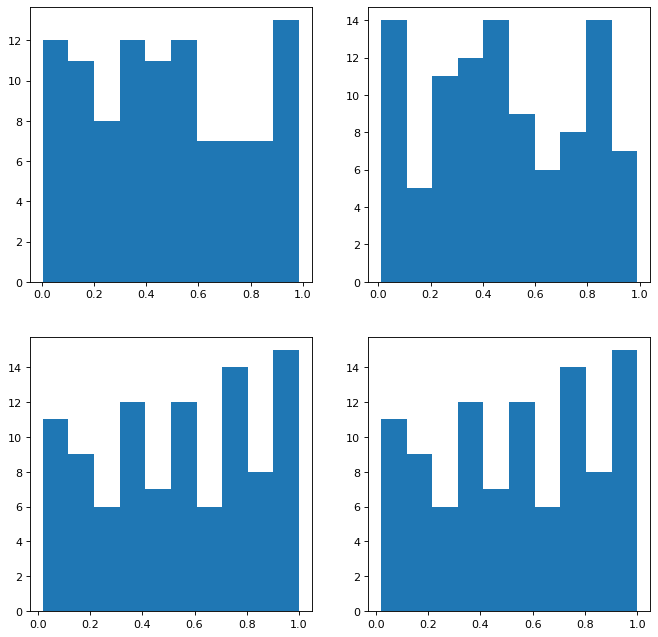

In [11]:

fig, axs = plt.subplots(2, 2,figsize=(10, 10), dpi=80)
##sin semilla predefinida
sec = []
for i in range(100):
    sec.append(random.random())
axs[0,0].hist(sec)
sec = []
for i in range(100):
    sec.append(random.random())
axs[0,1].hist(sec)

##con semilla predefinida
random.seed(0.5)
sec = []
for i in range(100):
    sec.append(random.random())
axs[1,0].hist(sec)

random.seed(0.5)
sec = []
for i in range(100):
    sec.append(random.random())
axs[1,1].hist(sec)


**Ejercicio 2:**
Pruebe las funciones y defina sus diferencias:

    - random.randint(a, b)
    - random.randrange(a, b)
    - random.uniform(a, b)
    

**Respuesta**
De acuerdo a las pruebas aqui disponibles y la documentación de Python, las dos primera funciones entregan valores enteros, en el rango definido. La única distinción es que randint, incluye el último item (b) entre los posibles valores en cambio randrange no. La funcion uniform devuelve valores reales en el abierto (a,b).

[-9, -8, -8, 1, -5, -1, -2, 9, -4, 9, -9, 8, -5, 3, 10, 2, 6, 1, 7, 4, 6, -2, -9, -10, 1, 4, 0, 2, 3, 6, -5, 7, -5, -3, -3, -10, -5, 0, -5, -6, 6, 6, 1, 6, 7, -5, 4, 3, 6, 1, 8, 1, 1, 4, -5, 2, 4, 10, 6, -3, 5, -2, 5, 6, 6, 1, 4, 4, 1, 8, 7, 4, 5, -3, 0, -5, 9, -2, 5, -1, -1, 6, 7, 6, 6, 10, 9, 8, 3, -1, -4, 5, 6, 1, 9, -8, 0, -10, -4, -7]
[-9, -8, -8, 1, -5, -1, -2, 9, -4, 9, -9, 8, -5, 3, 2, 6, 1, 7, 4, 6, -2, -9, -10, 1, 4, 0, 2, 3, 6, -5, 7, -5, -3, -3, -10, -5, 0, -5, -6, 6, 6, 1, 6, 7, -5, 4, 3, 6, 1, 8, 1, 1, 4, -5, 2, 4, 6, -3, 5, -2, 5, 6, 6, 1, 4, 4, 1, 8, 7, 4, 5, -3, 0, -5, 9, -2, 5, -1, -1, 6, 7, 6, 6, 9, 8, 3, -1, -4, 5, 6, 1, 9, -8, 0, -10, -4, -7, -9, 8, -9]
[9.120685437784989, 8.956549741186986, -8.868972645463826, -8.302560096821567, 6.709977562588993, 4.719399781370466, 3.3946080288044183, -3.8372708482171163, 2.118883313569249, 2.1360346728167574, 1.6240803422400614, -6.8323425949038885, -1.3866071941746263, -2.1293635958925723, 4.460241624749317, 9.896391258994854,

(array([2., 1., 2., 2., 1., 4., 1., 2., 1., 4.]),
 array([-8.86897265, -6.99243626, -5.11589986, -3.23936347, -1.36282708,
         0.51370931,  2.3902457 ,  4.26678209,  6.14331848,  8.01985487,
         9.89639126]),
 <BarContainer object of 10 artists>)

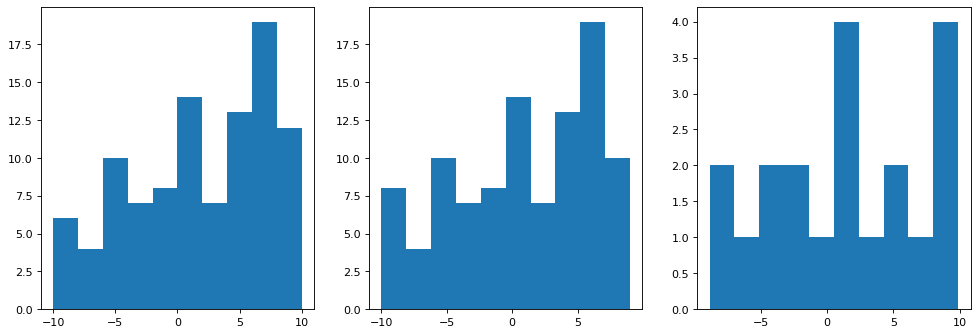

In [17]:
fig, axs = plt.subplots(1, 3,figsize=(15, 5), dpi=80)

sec = []
random.seed(2)
for i in range(100):
    sec.append(random.randint(-10,10))
print(sec)

axs[0].hist(sec)

sec = []
random.seed(2)
for i in range(100):
    sec.append(random.randrange(-10,10))
print(sec)
axs[1].hist(sec)


random.seed(2)
sec = []
for i in range(20):
    sec.append(random.uniform(-10,10))
print(sec)
axs[2].hist(sec)


### Clase NotSoRandom:

In [19]:
class NotSoRandom(object):
    def seed(self, a=3):
        """Seed the world's most mysterious random number generator."""
        self.seedval = a
    def random(self):
        """Look, random numbers!"""
        self.seedval = (self.seedval * 3) % 19
        return self.seedval

_inst = NotSoRandom()
seed = _inst.seed
random = _inst.random


**Ejercicio 3:**
- use la semilla 1234 y genere números aleatorios hasta que se cumpla un ciclo completo. ¿Cuál resultó ser el periodo?
- Intente con otra semilla y busque completar un ciclo. 

In [22]:
seed(1234)
sec = []
[sec.append(random()) for _ in range(19)]
print(sec)

[16, 10, 11, 14, 4, 12, 17, 13, 1, 3, 9, 8, 5, 15, 7, 2, 6, 18, 16]


In [24]:
seed(1)
sec = []
[sec.append(random()) for _ in range(19)]
print(sec)

[3, 9, 8, 5, 15, 7, 2, 6, 18, 16, 10, 11, 14, 4, 12, 17, 13, 1, 3]


**Respuesta**

El periodo del generador es 18 y no depende de la semilla si no que del valor utilizado como módulo m, es decir m-1

#### **Ejercicio 4:**
En este ejercicio vamos a comparar el generador de la biblioteca Random de Python con el generador de números pseudo-aleatorios congruencial lineal descrito en la sesión téórica. Para ello se pide lo siguiente:
1. Programe el generador de números pseudo-aleatorios congruencial lineal 
2. Extraiga secuencias del generador programado y del predefinido en Python, grafique en histogramas, compare y concluya.


In [31]:
class RandomCL(object):
    def seed(self, a=3):
        self.seedval = a
    def random(self):
        self.seedval = (self.seedval * 1687) % 2147483647
        return self.seedval

_inst =RandomCL()
seedCL = _inst.seed
randomCL = _inst.random


(array([ 9836.,  9984.,  9999., 10002.,  9998.,  9977., 10036., 10120.,
         9974., 10074.]),
 array([1.10222908e-05, 1.00009667e-01, 2.00008312e-01, 3.00006957e-01,
        4.00005602e-01, 5.00004246e-01, 6.00002891e-01, 7.00001536e-01,
        8.00000181e-01, 8.99998826e-01, 9.99997470e-01]),
 <BarContainer object of 10 artists>)

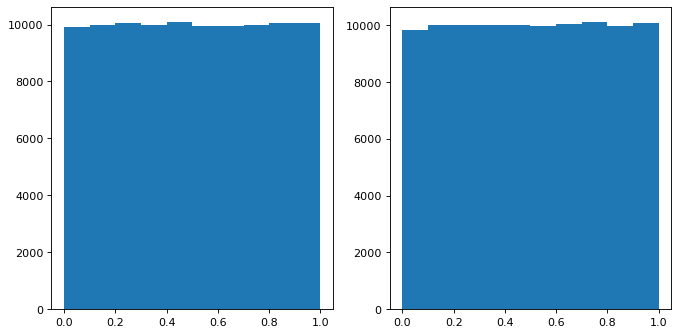

In [35]:
fig, axs = plt.subplots(1, 2,figsize=(10, 5), dpi=80)

seedCL(1)
M= 2147483647
sec = []
for i in range(100000):
    sec.append(randomCL()/M)

axs[0].hist(sec)

sec = []
for i in range(100000):
    sec.append(random.uniform(0,1))

axs[1].hist(sec)




**Respuesta:**

Al comparar las secuencias de números pseudo-aleatorios de los dos métodos se observa que ambos convergen de manera similar al comportamiento de la U[0,1] al aumentar el número de datos generados.

#### **Ejercicio 5:**
Escoja una distribución de probabilidad continua.
1. Utilice un método predefinido en Python para generar una secuencia de valores pseudo-aleatorios provenientes de dicha distribución
2. Genere una secuencia considerando el algoritmo de la transformada inversa.
3. Grafique en histogramas y compare las secuencias en (1) y (2) utilizando el test de k-s

KstestResult(statistic=0.02896144172956594, pvalue=0.3642966734415609)
KstestResult(statistic=0.021441196595027967, pvalue=0.7389670893715528)
KstestResult(statistic=0.037, pvalue=0.5005673707894058)


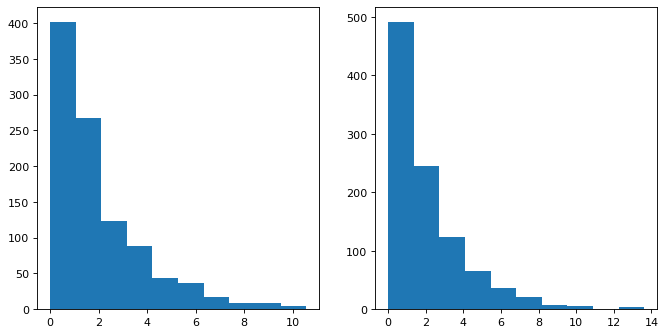

In [45]:
## simulación exponencial
import scipy.stats as stats
import math

fig, axs = plt.subplots(1, 2,figsize=(10, 5), dpi=80)


N=1000
s = 2
sec1 = stats.expon.rvs(scale=s,size =N)

axs[0].hist(sec1)

sec2 = []
for i in range(N):
    y = random.uniform(0,1)
    sec2.append(-s*math.log(1-y))

axs[1].hist(sec2)

test1 = scipy.stats.kstest(sec1, 'expon', args=(0,s))
test2 = scipy.stats.kstest(sec2, 'expon', args=(0,s))
test3 = scipy.stats.kstest(sec1, sec2)
print(test1)
print(test2)
print(test3)

Ambas muestras provienen de la distribución exponencial de tasa 1/s, de acuerdo a los histogramas y el k-s test.

#### **Ejercicio 6:**
Escoja una distribución de probabilidad discreta.
1. Utilice un método predefinido en Python para generar una secuencia de valores pseudo-aleatorios provenientes de dicha distribución
2. Genere una secuencia considerando el algoritmo de la transformada inversa.
3. Grafique en histogramas y compare las secuencias en (1) y (2). ¿Qué test sería adecuado utilizar en este caso?

(array([6.101e+03, 0.000e+00, 3.023e+03, 0.000e+00, 7.400e+02, 0.000e+00,
        1.250e+02, 0.000e+00, 9.000e+00, 2.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

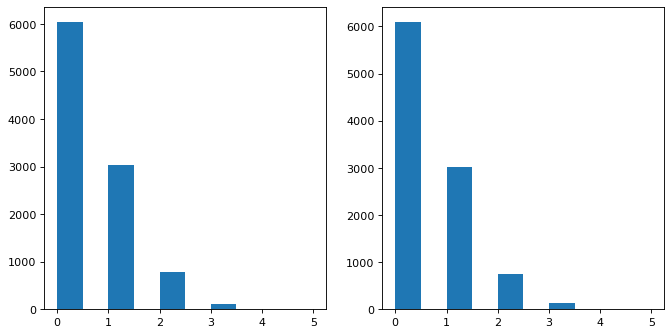

In [22]:
## simulación poisson
import scipy.stats as stats
import math

fig, axs = plt.subplots(1, 2,figsize=(10, 5), dpi=80)


N=10000
m = 0.5
sec1 = stats.poisson.rvs(mu=m,size =N)

axs[0].hist(sec1)

sec2 = []
for i in range(N):
    y = random.uniform(0,1)
    k=0
    sum = stats.poisson.cdf(k,mu=m)
    while (sum < y):
        k=k+1
        sum =stats.poisson.cdf(k,mu=m)
        
    sec2.append(k)

axs[1].hist(sec2)



Ambas muestras provienen de la distribución exponencial de tasa m, de acuerdo a los histogramas. Se requiere utilizar un test del estilo chi-cuadrado para testear si las muestras provienen de la distribución discreta Poisson

In [33]:
freq1 = np.unique(sec1,return_counts=True)
freq2 = np.unique(sec2, return_counts=True)
print(freq1[1],freq2[1])

[6047 3039  787  113   13    1] [6101 3023  740  125    9    2]


In [34]:
test1 = stats.chisquare(freq1[1],freq2[1])
print(test1)

Power_divergenceResult(statistic=6.977551435265962, pvalue=0.22231519737265626)


No se rechaza la hipótesis que ambas muestras provengan de la misma distribución

**Referencias:**
    
- Generating Random Data in Python (Guide): https://realpython.com/python-random/

- Generación de números pseudo-aleatorios: https://www.youtube.com/watch?v=C82JyCmtKWg